# Geometrical form factor for lidar function

In [391]:
import numpy as np
import matplotlib.pyplot as plt

## Functions

### $r_1$, $r_2$ - function

In [348]:
def r_section_function(r, z, phi):
    return r + z*np.tan(phi)

### Overlap area

In [349]:
def phi_function(r_1, r_2, d):
    p = (r_1**2 + d**2 - r_2**2) / (2*r_1*d)
    p = 1*p*(np.abs(p) <= 1) + 1*(np.abs(p) > 1)
    return np.arccos(p)

In [350]:
def a(r_1, r_2, d):
    phi_1, phi_2 = phi_function(r_1, r_2, d), phi_function(r_2, r_1, d)
    a_1 = 0
    a_2 = np.pi * np.minimum(r_1, r_2)**2
    a_3 = 0.5 * (r_1**2 * (2*phi_1 - np.sin(2*phi_1)) + r_2**2 * (2*phi_2 - np.sin(2*phi_2)))
    return 1*(d > r_1 + r_2)*a_1 + 1*(d < np.abs(r_1 - r_2))*a_2 + 1*(d > np.abs(r_1 - r_2))*(d < r_1 + r_2)*a_3

### $\chi$ - function

In [351]:
def chi_function(r_1, r_2, d):
    return np.abs(((r_1 + r_2)**2 - d**2) * (d**2 - (r_1 - r_2)**2))

### $\omega$ - function

In [352]:
def omega_function(z, omega_laser, phi_laser):
    return np.sqrt(omega_laser**2 + (phi_laser*z)**2)

### $\bar{r}$ - function

In [353]:
def r_bar_function(r_1, r_2, z, omega_laser, phi_laser):
    return np.maximum(omega_function(z, omega_laser, phi_laser), r_1 + r_2)

### $S$ - function

In [396]:
def s_function(r_1, r_2, d, z, omega_laser, phi_laser):
    omega = omega_function(z, omega_laser, phi_laser)
    r_bar = r_bar_function(r_1, r_2, z, omega_laser, phi_laser)
    chi = chi_function(r_1, r_2, d)
    p = (r_1**2 + r_2**2 - r_bar**2) / (2*r_1*r_2)
    p = 1*p*(np.abs(p) <= 1) + 1*(np.abs(p) > 1)
    s_1 = r_bar**2 * a(r_1, r_2, r_bar) + 0.25 * (r_bar**2 - r_1** - r_2**2) * np.sqrt(chi) + (r_1*r_2)**2 * np.arccos(p)
    s_2 = np.pi * omega**2 * np.minimum(r_1, r_2)**2
    return 1*(omega >= np.abs(r_1 - r_2))*s_1 + 1*(omega < np.abs(r_1 - r_2))*s_2

### $G_{FF}$ - function

In [355]:
def gff_function(d, z, omega_laser, phi_laser, r_telescope, r_laser):
    r_1, r_2 = r_section_function(r_telescope, z, phi_telescope), r_section_function(r_laser, z, phi_laser)
    return (s_function(r_1, r_telescope, d, z, omega_laser, phi_laser) - s_function(r_1, r_laser, d, z, omega_laser, phi_laser)) / omega_function(z, omega_0, phi_0)**2

## Results analysis

In [356]:
r_telescope = 0.175
r_laser = 0.04
omega_laser = 0.01
d = 0.22
phi_laser = 5e-4
phi_telescope = 7.5e-4

In [393]:
n = 500

z = np.linspace(0, 500, n)

r_1, r_2 = r_function(r_telescope, z, phi_telescope), r_function(r_laser, z, phi_laser)

### Overlap area

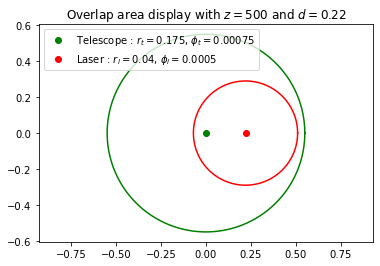

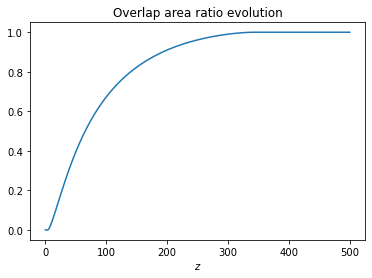

In [394]:
t = np.linspace(0, 2*np.pi, n)

x_telescope = r_1[-1] * np.cos(t)
y_telescope = r_1[-1] * np.sin(t)
x_telescope_centre, y_telescope_centre = 0, 0

x_laser = d + r_2[-1] * np.cos(t)
y_laser = r_2[-1] * np.sin(t)
x_laser_centre, y_laser_centre = d, 0

plt.figure()
plt.plot(x_telescope, y_telescope, color = 'g')
plt.plot(x_telescope_centre, y_telescope_centre, 'o', color = 'g', label = "Telescope : $r_t =" + str(r_telescope) +"$, $\phi_t =" + str(phi_telescope) + "$")
plt.plot(x_laser, y_laser, color = 'r')
plt.plot(x_laser_centre, y_laser_centre, 'o', color = 'r', label = "Laser : $r_l =" + str(r_laser) +"$, $\phi_l =" + str(phi_laser) + "$")
plt.axis('equal')
plt.legend(loc = "upper left")
plt.title("Overlap area display with $z =" + str(int(z[-1])) + "$ and $d =" + str(d) + "$")
plt.show()

plt.figure()
plt.plot(z, a(r_1, r_2, d)/(np.pi*r_2**2))
plt.xlabel("$z$")
plt.title("Overlap area ratio evolution")
plt.show()

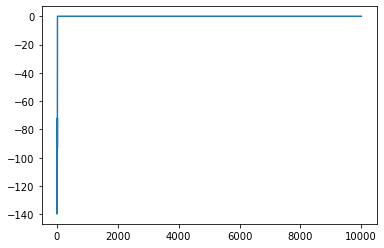

In [421]:
z = np.linspace(0.01, 10000, 100000)

gff = gff_function(d, z, omega_laser, phi_laser, r_telescope, r_laser)

plt.figure()
plt.plot(z, gff)
plt.show()

## $\xi$ - function

In [358]:
def xi(r, x, y, r_a, r_b, r_0, f):
    r_c = r_0*f / r
    r_b_prime = r_b*f / r
    r_f = np.sqrt(x**2 + y**2)*f / r
    return (a(r_a, r_c, r_f) - a(r_a, r_b_prime, r_f)) / (np.pi*(r_c**2 - r_b**2))